# <center> Trabalho 05 - Introdução ao Processamento de Imagem Digital </center>

**Aluna:** Marianna de Pinho Severo <br>
**RA**: 264960 <br>
**Professor:** Hélio Pedrini

### Passo 01: Importar bibliotecas

In [1]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Passo 02: Ler imagens

In [2]:
images = {}

In [3]:
images['building1'] = cv.imread('input_images/foto1A.jpg',0)
images['building2'] = cv.imread('input_images/foto1B.jpg',0)
images['lake1'] = cv.imread('input_images/foto2A.jpg',0)
images['lake2'] = cv.imread('input_images/foto2B.jpg',0)
images['road1'] = cv.imread('input_images/foto3A.jpg',0)
images['road2'] = cv.imread('input_images/foto3B.jpg',0)
images['desert_road1'] = cv.imread('input_images/foto4A.jpg',0)
images['desert_road2'] = cv.imread('input_images/foto4B.jpg',0)
images['field1'] = cv.imread('input_images/foto5A.jpg',0)
images['field2'] = cv.imread('input_images/foto5B.jpg',0)

### Passo 03: Encontrar pontos de interesse

#### Passo 3.1: ORB

In [4]:
img1 = images['field1']
img2 = images['field2']

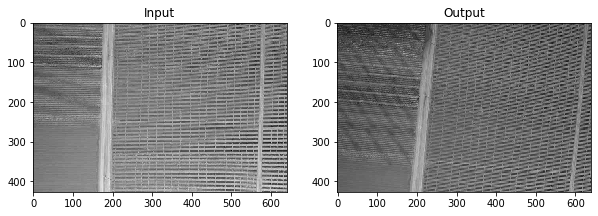

In [5]:
plt.figure(figsize = (10,10))
plt.subplot(121),plt.imshow(img1, cmap='gray'),plt.title('Input')
plt.subplot(122),plt.imshow(img2, cmap='gray'),plt.title('Output')
plt.show()

In [6]:
# orb = cv.ORB_create()
# kp1, des1 = orb.detectAndCompute(img1,None)
# kp2, des2 = orb.detectAndCompute(img2,None)

In [7]:
orb = cv.ORB_create()
brief = cv.xfeatures2d.BriefDescriptorExtractor_create()

kp1, des1 = orb.detect(img1,None)
kp2, des2 = orb.detect(img2,None)

kp1, des1 = brief.compute(img1, kp1)
kp2, des2 = brief.compute(img2, kp2)

ValueError: too many values to unpack (expected 2)

### Passo 04: Encontrar similaridades

In [ ]:
matcher = cv.DescriptorMatcher_create(cv.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

In [ ]:
matches = matcher.match(des1, des2, None)

In [ ]:
matches.sort(key=lambda x: x.distance, reverse=False)

In [ ]:
numGoodMatches = int(len(matches) * 0.15)

In [ ]:
matches = matches[:numGoodMatches]

In [ ]:
# Draw first 10 matches.
plt.figure(figsize=(10,10))
imMatches = cv.drawMatches(img1, kp1, img2, kp2, matches, None)
plt.imshow(imMatches),plt.show()

In [ ]:
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

### Passo 05: Estimar matriz de homografia

In [ ]:
if len(matches)>=4:
    for i, match in enumerate(matches):
        points1[i, :] = kp1[match.queryIdx].pt
        points2[i, :] = kp2[match.trainIdx].pt
    
    h, mask = cv.findHomography(points1, points2, cv.RANSAC,5.0)

In [ ]:
h

### Passo 06: Alinhar imagens

In [ ]:
height, width = img2.shape

In [ ]:
img1Reg = cv.warpPerspective(img1, h, (width+img1.shape[1], height+img1.shape[0]))

In [ ]:
img1Reg[:img2.shape[0],:img2.shape[1]] = img2

In [ ]:
plt.figure(figsize = (10,10))
plt.subplot(121),plt.imshow(img2, cmap='gray'),plt.title('Input')
plt.subplot(122),plt.imshow(img1Reg, cmap='gray'),plt.title('Output')
plt.show()

In [ ]:
cv.imwrite('t1.jpg', cv.cvtColor(img1Reg,cv.COLOR_GRAY2BGR))